In [1]:
## Plotting history 
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plotting training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()


In [2]:
## Plotting confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(y_val, y_pred, title):
    y_pred_classes = y_pred
    y_true_classes = y_val

    # Create and plot confusion matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)

    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix:  ' + title)
    plt.show()



In [3]:
import pandas as pd

In [7]:
df = pd.read_csv("../../data/mendeley/HateSpeechDatasetBalanced.csv")
df.columns = df.columns.str.lower()

df.head()

,content,label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1


In [8]:
df.shape

(726119, 2)

## Preprocessing steps

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

tweets = df['content'].tolist()
labels = df['label'].tolist()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets) ## tokenizer fit to our vocabulary

tweet_sequences = tokenizer.texts_to_sequences(tweets)

max_sequence_length = 55  ## padding to ensure uniformity in length of the sequences
tweet_padded = pad_sequences(tweet_sequences, maxlen=max_sequence_length, padding='post')
print(tweet_padded[:2])
labels = np.array(labels)

[[ 2091     8   683     1  3998    18   635     2   256    16 22961    38
   2496   840     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [   37    43    87   568     2  2184    15 12837   492  2663   305     3
    800     4   423     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


---


In [13]:
## Defined for all models

embedding_dim = 55 
vocab_size = len(tokenizer.word_index) + 1
epochs = 5 
batch_size = 32  

# Split the data into training and validation sets == updated split to 98/1/1 so to save 7k tweets to test, 7k for val, and use everything else for training
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(tweet_padded, labels, test_size=0.02, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)


In [14]:
X_train.shape, X_val.shape, X_test.shape

((711596, 55), (7261, 55), (7262, 55))

In [16]:
X_train[:2]

array([[ 1946,   396,   199,   827,    55,   658,    16,  3836,     6,
         1223,     2,   506,    65,   133,  1169,    19,    75,  2250,
           43,    65,   133,    19,    75, 14195,    26,  7036,    13,
           11,  3172,  2274,     6, 43835,  2274,    13,    21,   127,
         3172,  2274,    21,    65,   133, 36499,    13,    12,   984,
            6,     5,    34,   408,    40,  3172,     2, 13009,    11,
         6381],
       [    1,  6313,     7,  2352,  2187,    26,    20,    83,     7,
          201,    22,     4,    37,   540,    17,   293,    12,    24,
          101,     7,   287,     1,  2560,   198,   284,   183,    39,
           31,    19,    75,   468,    12,     3,  1224,   840,     6,
            5,   271,     1,  9581,   622,    31,    95,  1201,  1199,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0]])

---  

Old way of preprocessing, now splitting before preprocessing

In [28]:
def preprocess_data(tweets, tokenizer=None, max_sequence_length=55):
    if tokenizer is None:
        tokenizer = Tokenizer()
        tokenizer.fit_on_texts(tweets)  # Tokenizer fit to our vocabulary

    tweet_sequences = tokenizer.texts_to_sequences(tweets)

    # Padding to ensure uniformity in length of the sequences
    tweet_padded = pad_sequences(tweet_sequences, maxlen=max_sequence_length, padding='post')

    return tweet_padded, tokenizer

In [70]:
tweets = df['content'].tolist()
labels = df['label'].tolist()

In [71]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(tweets, labels, test_size=0.02, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

In [72]:
len(X_train), len(X_val), len(X_test)

(711596, 7261, 7262)

In [88]:
pd.DataFrame({'tweets': X_train, 'labels':y_train}).to_csv('../../preprocessed/mendeley/train.csv')
pd.DataFrame({'tweets': X_val, 'labels':y_val}).to_csv('../../preprocessed/mendeley/val.csv')
pd.DataFrame({'tweets': X_test, 'labels':y_test}).to_csv('../../preprocessed/mendeley/test.csv')


In [37]:
X_train[:2]

['no because the estimates are not only from a not an insult just cold hard fact nobody who goes on forums and likes to guess how many games have been sold by how many have been shipped but estimates are not sales figures and shipment figures are as much sales figures as how many polygons are in fix and i am talking about sales to gamers not stores',
 'the motor is machine guns but your fuck is wrong with you just exactly what part in my edit is vandalism the moves we removed feel like they have been written in a sexual retard and i added the entrance song they were front row']

In [38]:
# Preprocess the data
X_train, tokenizer = preprocess_data(X_train)
X_val, _ = preprocess_data(X_val, tokenizer=tokenizer)
X_test, _ = preprocess_data(X_test, tokenizer=tokenizer)

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [39]:
import pickle

# Save the tokenizer
with open('../../models/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [41]:
# Load the tokenizer
with open('../../models/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [42]:
# Model parameters
embedding_dim = 55 
vocab_size = len(tokenizer.word_index) + 1
epochs = 5 
batch_size = 32 

### batch normalization and regularization

In [45]:
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential


cnn_model_regularization = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_sequence_length),
    Conv1D(128, 5, activation='relu', kernel_regularizer=l2(0.001)),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    BatchNormalization(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

cnn_model_regularization.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

cnn_model_regularization.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
## updating epochs to further analyse the model
epochs= 15
cnn_history_regularization = cnn_model_regularization.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))


Epoch 1/15
22238/22238 ━━━━━━━━━━━━━━━━━━━━ 960s 43ms/step - accuracy: 0.7810 - loss: 0.5282 - val_accuracy: 0.8463 - val_loss: 0.3820
Epoch 2/15
22238/22238 ━━━━━━━━━━━━━━━━━━━━ 948s 43ms/step - accuracy: 0.8410 - loss: 0.3981 - val_accuracy: 0.8554 - val_loss: 0.3641
Epoch 3/15
22238/22238 ━━━━━━━━━━━━━━━━━━━━ 917s 41ms/step - accuracy: 0.8539 - loss: 0.3754 - val_accuracy: 0.8609 - val_loss: 0.3584
Epoch 4/15
22238/22238 ━━━━━━━━━━━━━━━━━━━━ 920s 41ms/step - accuracy: 0.8638 - loss: 0.3579 - val_accuracy: 0.8581 - val_loss: 0.3641
Epoch 5/15
22238/22238 ━━━━━━━━━━━━━━━━━━━━ 931s 42ms/step - accuracy: 0.8713 - loss: 0.3456 - val_accuracy: 0.8663 - val_loss: 0.3482
Epoch 6/15
22238/22238 ━━━━━━━━━━━━━━━━━━━━ 958s 43ms/step - accuracy: 0.8774 - loss: 0.3390 - val_accuracy: 0.8682 - val_loss: 0.3536
Epoch 7/15
22238/22238 ━━━━━━━━━━━━━━━━━━━━ 957s 43ms/step - accuracy: 0.8808 - loss: 0.3309 - val_accuracy: 0.8668 - val_loss: 0.3507
Epoch 8/15
22238/22238 ━━━━━━━━━━━━━━━━━━━━ 1087s 49ms/

In [47]:
import pickle

# Save the training history
with open('../../histories/cnn_history_regularization.pkl', 'wb') as file:
    pickle.dump(cnn_history_regularization.history, file)

# Save model
cnn_model_regularization.save('../../models/cnn_model_regularization.keras')

In [57]:
cnn_model_regularization.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 55, 55)         │     7,487,315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 51, 128)        │        35,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,594,430 (86.19 MB)

 Trainable params: 7,531,348 (28.73 MB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 15,062,698 (57.46 MB)

In [49]:
from tensorflow.keras.models import load_model

# Load the model
loaded_regularized_model = load_model('../../models/cnn_model_regularization.keras')

# Load the training history
with open('../../histories/cnn_history_regularization.pkl', 'rb') as file:
    loaded_regularized_history = pickle.load(file)

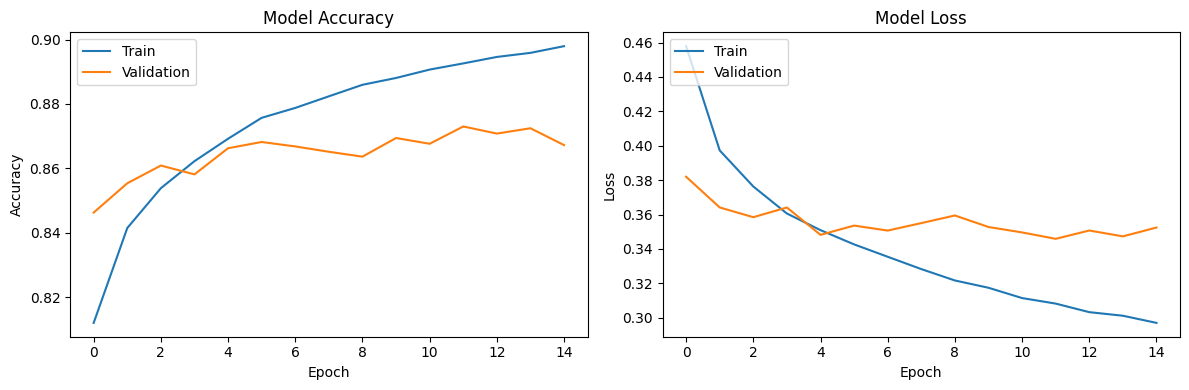

In [50]:
## plot model history 

plot_training_history(loaded_regularized_history)
# loaded_first_history

In [51]:
## make predictions
y_pred_regularized = loaded_regularized_model.predict(X_val)


227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [52]:
threshold=0.5

y_pred_regularized_classes = (y_pred_regularized > threshold).astype(int).flatten()
print("Sample prediction classes:", y_pred_regularized_classes[:10])


Sample prediction classes: [1 0 1 1 1 0 1 1 1 1]


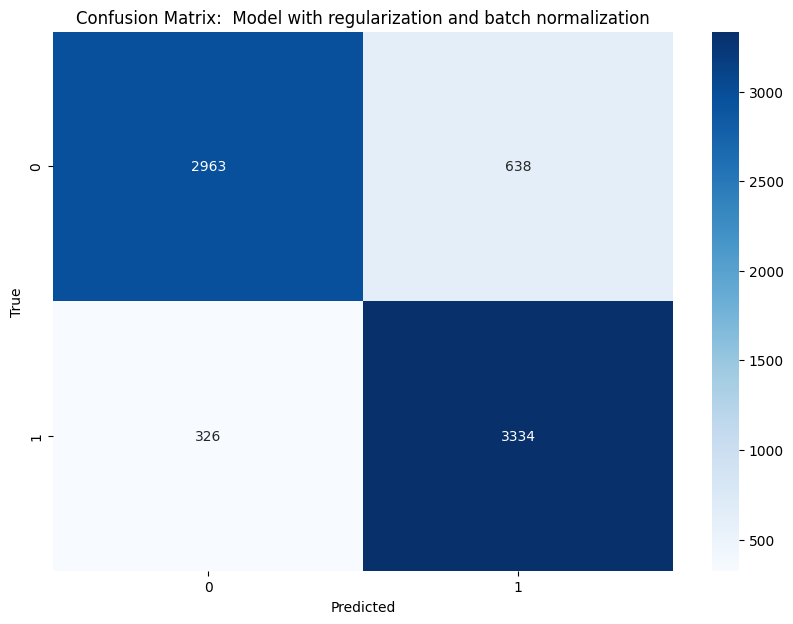

In [53]:

## plotting function 
plot_confusion_matrix(y_val, y_pred_regularized_classes, title="Model with regularization and batch normalization")

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred_regularized_classes))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      3601
           1       0.84      0.91      0.87      3660

    accuracy                           0.87      7261
   macro avg       0.87      0.87      0.87      7261
weighted avg       0.87      0.87      0.87      7261



## Trying a more complex model

In [58]:
complex_model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_sequence_length),
        Conv1D(256, 5, activation='relu', kernel_regularizer=l2(0.001)),
        Conv1D(128, 5, activation='relu', kernel_regularizer=l2(0.001)),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        BatchNormalization(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        BatchNormalization(),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        BatchNormalization(),
        Dense(1, activation='sigmoid')
    ])
complex_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

complex_model.summary()

c:\Users\bemne\anaconda3\envs\al\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_4          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [59]:
## updating epochs to further analyse the model
epochs= 15
complex_history = complex_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))


Epoch 1/15
22238/22238 ━━━━━━━━━━━━━━━━━━━━ 1568s 70ms/step - accuracy: 0.7592 - loss: 0.5996 - val_accuracy: 0.8420 - val_loss: 0.3935
Epoch 2/15
22238/22238 ━━━━━━━━━━━━━━━━━━━━ 1416s 64ms/step - accuracy: 0.8409 - loss: 0.3925 - val_accuracy: 0.8535 - val_loss: 0.3598
Epoch 3/15
22238/22238 ━━━━━━━━━━━━━━━━━━━━ 1417s 64ms/step - accuracy: 0.8600 - loss: 0.3607 - val_accuracy: 0.8570 - val_loss: 0.3616
Epoch 4/15
22238/22238 ━━━━━━━━━━━━━━━━━━━━ 1477s 66ms/step - accuracy: 0.8718 - loss: 0.3403 - val_accuracy: 0.8637 - val_loss: 0.3553
Epoch 5/15
22238/22238 ━━━━━━━━━━━━━━━━━━━━ 1607s 72ms/step - accuracy: 0.8805 - loss: 0.3236 - val_accuracy: 0.8656 - val_loss: 0.3452
Epoch 6/15
22238/22238 ━━━━━━━━━━━━━━━━━━━━ 1633s 73ms/step - accuracy: 0.8871 - loss: 0.3120 - val_accuracy: 0.8518 - val_loss: 0.3681
Epoch 7/15
22238/22238 ━━━━━━━━━━━━━━━━━━━━ 1652s 74ms/step - accuracy: 0.8925 - loss: 0.3027 - val_accuracy: 0.8639 - val_loss: 0.3403
Epoch 8/15
22238/22238 ━━━━━━━━━━━━━━━━━━━━ 1740

In [60]:
import pickle

# Save the training history
with open('../../histories/complex_history.pkl', 'wb') as file:
    pickle.dump(complex_history.history, file)

# Save model
complex_model.save('../../models/complex_model.keras')

In [61]:
complex_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 55, 55)         │     7,487,315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 51, 256)        │        70,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 47, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_4          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,242,878 (88.66 MB)

 Trainable params: 7,747,412 (29.55 MB)

 Non-trainable params: 640 (2.50 KB)

 Optimizer params: 15,494,826 (59.11 MB)

In [62]:
from tensorflow.keras.models import load_model

# Load the model
loaded_complex_model = load_model('../../models/complex_model.keras')

# Load the training history
with open('../../histories/complex_history.pkl', 'rb') as file:
    loaded_complex_history = pickle.load(file)

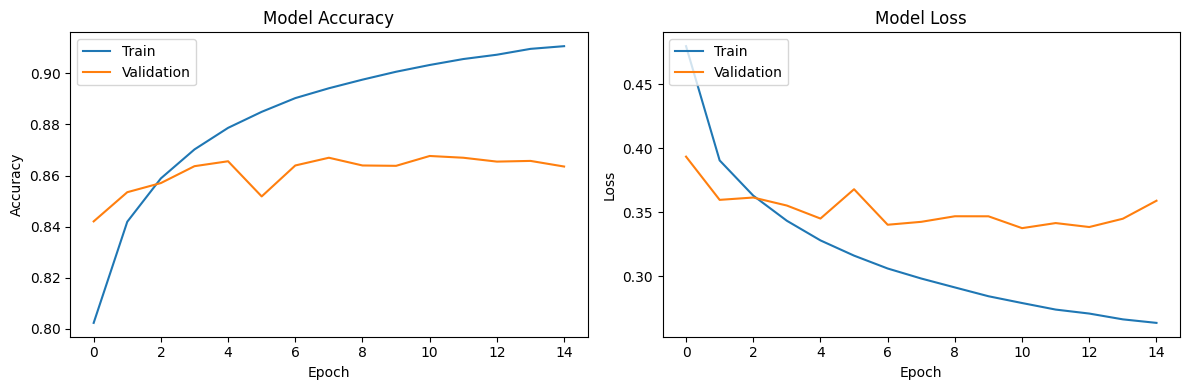

In [63]:
## plot model history 

plot_training_history(loaded_complex_history)
# loaded_first_history

In [64]:
## make predictions
y_pred_complex = loaded_complex_model.predict(X_val)


227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step


In [65]:
threshold=0.5

y_pred_complex_classes = (y_pred_complex > threshold).astype(int).flatten()
print("Sample prediction classes:", y_pred_complex_classes[:10])


Sample prediction classes: [1 0 1 0 1 0 1 0 1 1]


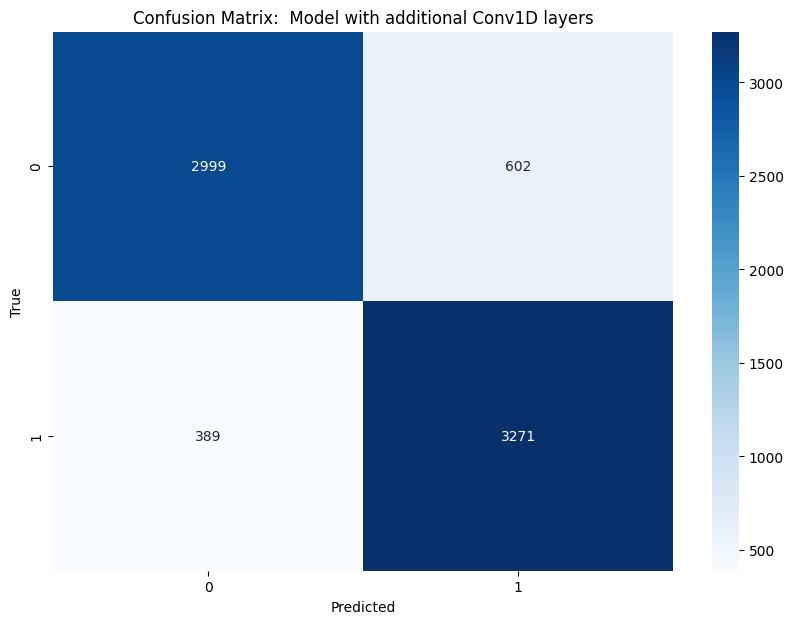

In [66]:

## plotting function 
plot_confusion_matrix(y_val, y_pred_complex_classes, title="Model with additional Conv1D layers")

In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred_complex_classes))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      3601
           1       0.84      0.89      0.87      3660

    accuracy                           0.86      7261
   macro avg       0.86      0.86      0.86      7261
weighted avg       0.86      0.86      0.86      7261

